# Basic Usage
In this jupyter we will follow the [basic usage from emcee](https://emcee.readthedocs.io/en/stable/), with the adaptative parallel tempering sampler.

## Import dependencies

In [1]:
import numpy as np
import reddemcee

## Define the likelihood and prior
Here comes the first difference, for optimisation, the loglikelihood and logprior are fed separately into the sampler.

In [2]:
def log_like(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

def log_prior(x):
    return 0.0

## Setup the sampler
We can include either the number of temperatures as $ntemps$ or the beta ladder as an array. If not, the default is 5 dimensions
geometric spaced ladder, according to the number of dimensions as is [usual in literature](https://arxiv.org/abs/physics/0508111).
Mind this chain hasthe same length of emcee's basic usage example, as it uses 5 temperatures and 1/5th of the number of steps

In [9]:
ndim, nwalkers = 5, 100
ntemps = 5
ivar = 1. / np.random.rand(ndim)
p0 = list(np.random.randn(10, nwalkers, ndim))

In [10]:
sampler = reddemcee.PTSampler(nwalkers, ndim, log_like, log_prior, logl_args=[ivar])
sampler.run_mcmc(p0, 2000)

100%|████████████████████████████████████████████████████████████| 2000/2000 [00:38<00:00, 52.10it/s]


[State([[-9.00510484e-01  9.61314531e-01  8.36078650e-02  1.47912667e+00
    2.18889156e-01]
  [-7.83137201e-01 -2.25640425e-01 -7.88716193e-02 -1.63154331e+00
    1.77095550e+00]
  [ 6.87198559e-01  4.65410881e-01 -1.33738454e-02  3.15093454e-01
    2.46819968e-01]
  [ 4.10889098e-01 -1.22251822e+00  8.46831024e-02  4.03092123e-02
    2.77738804e-01]
  [-1.00050424e-01 -1.26132084e+00  4.69634742e-02  1.03325048e-01
    9.01129517e-01]
  [ 1.14535860e+00 -9.67227362e-01  1.21012675e-01  5.00290935e-01
   -9.21078724e-02]
  [ 9.23110997e-02 -1.58323830e-01 -7.01190423e-02 -1.03070432e+00
   -9.64633084e-02]
  [-3.25881555e-01  5.64299897e-01 -1.75581130e-01 -2.29045508e-01
   -6.25229925e-01]
  [ 1.25091184e+00 -4.88646245e-01  7.05445347e-02 -2.94707267e-01
    3.13577247e-01]
  [ 1.95184535e-01 -3.52600213e-01 -4.44656772e-02  1.40199745e+00
    1.67807866e+00]
  [ 2.33124522e+00 -2.49666992e-01 -2.07339012e-01  3.07470725e-01
    2.26803865e+00]
  [-3.92897126e-01 -2.88040834e-01 -8

## Plots and such

In [20]:
mc = '#F8F8F8'
def plot_chains(sampler, t=None):
    if t == None:
        samples = sampler.get_chain()
    else:
        samples = sampler[t].get_chain()
        
    ndims = samples.shape[2]
    fig, axes = pl.subplots(ndims, figsize=(10, 7), sharex=True)
    
    for i in range(ndims):
        ax = axes[i]
        ax.plot(samples[:, :, i], mc, alpha=0.3)
        ax.set_xlim(0, len(samples))
    
def plot_post(sampler, i, t=None):
    if t == None:
        samples = sampler.get_chain()
        logprob = sampler.get_log_prob()
    else:
        samples = sampler[t].get_chain()
        logprob = sampler[t].get_log_prob()
    
    for n in range(samples.shape[1]):
        pl.scatter(samples[:,n,i], logprob[:,n],
               color=mc, marker='o', alpha=0.3)
    pass

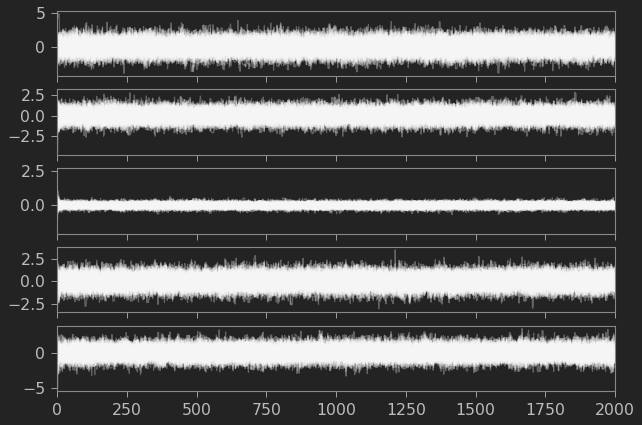

In [12]:
plot_chains(sampler, t=0)

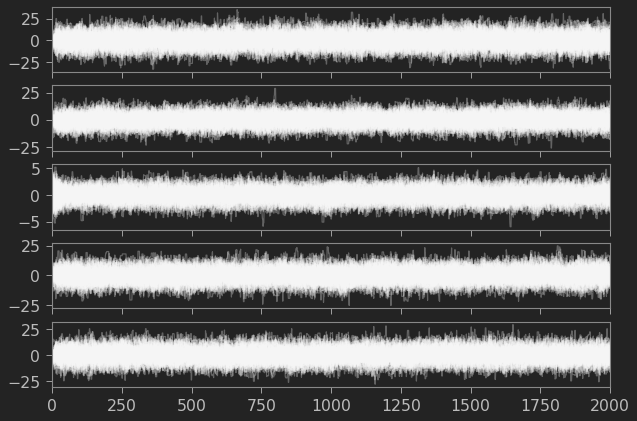

In [13]:
plot_chains(sampler, t=-1)

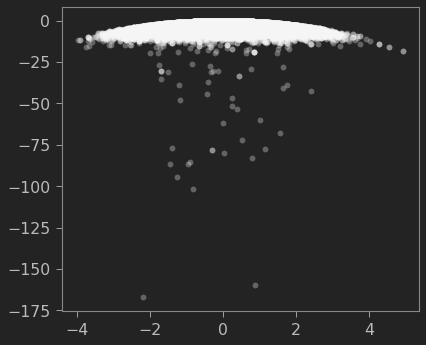

In [21]:
plot_post(sampler, 0, t=0)

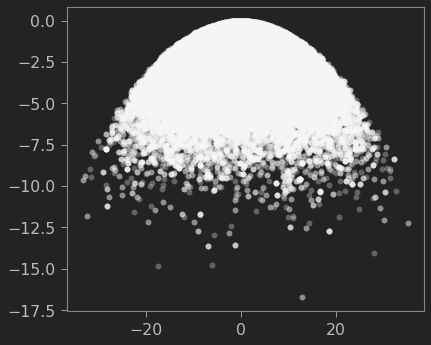

In [22]:
plot_post(sampler, 0, t=-1)